In [3]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')
species_names = iris.target_names

print(X.head())
print(y.value_counts())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
species
0    50
1    50
2    50
Name: count, dtype: int64


Variance expliquée par chaque composante : [0.92461872 0.05306648]


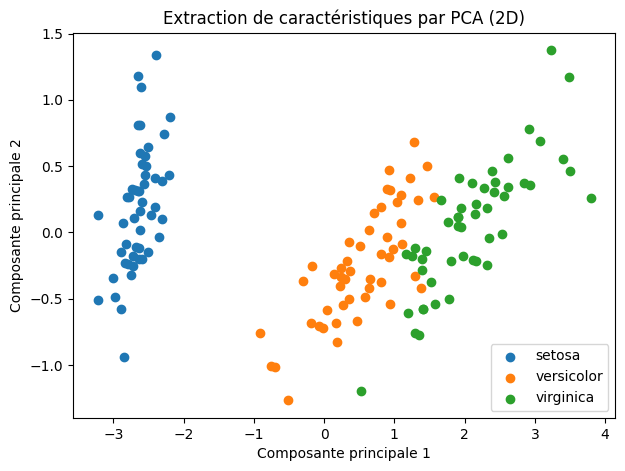

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)

plt.figure(figsize=(7, 5))
for i, label in enumerate(species_names):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], label=label)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Extraction de caractéristiques par PCA (2D)")
plt.legend()
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.9111111111111111


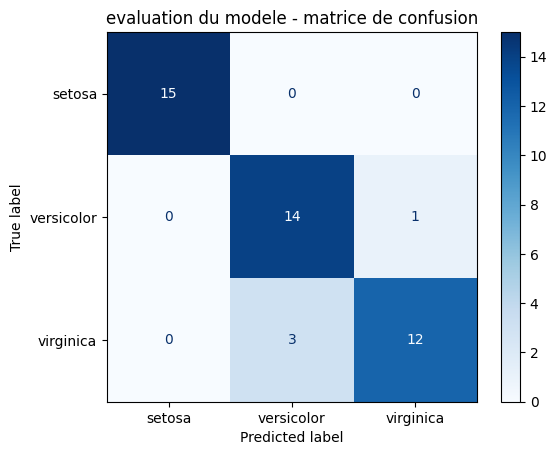

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=species_names).plot(cmap='Blues')
plt.title("evaluation du modele - matrice de confusion")
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Taille du jeu d'entrainement : {X_train.shape}, test : {X_test.shape}")

Taille du jeu d'entrainement : (60000, 28, 28), test : (10000, 28, 28)


In [6]:
plt.figure()
for i in range(10):
    

(60000, 28, 28)
